<a href="https://colab.research.google.com/github/sakathia/DATA201/blob/main/DATA201_Project1_Sandra_Aching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Top 1000 Movies in IMDb
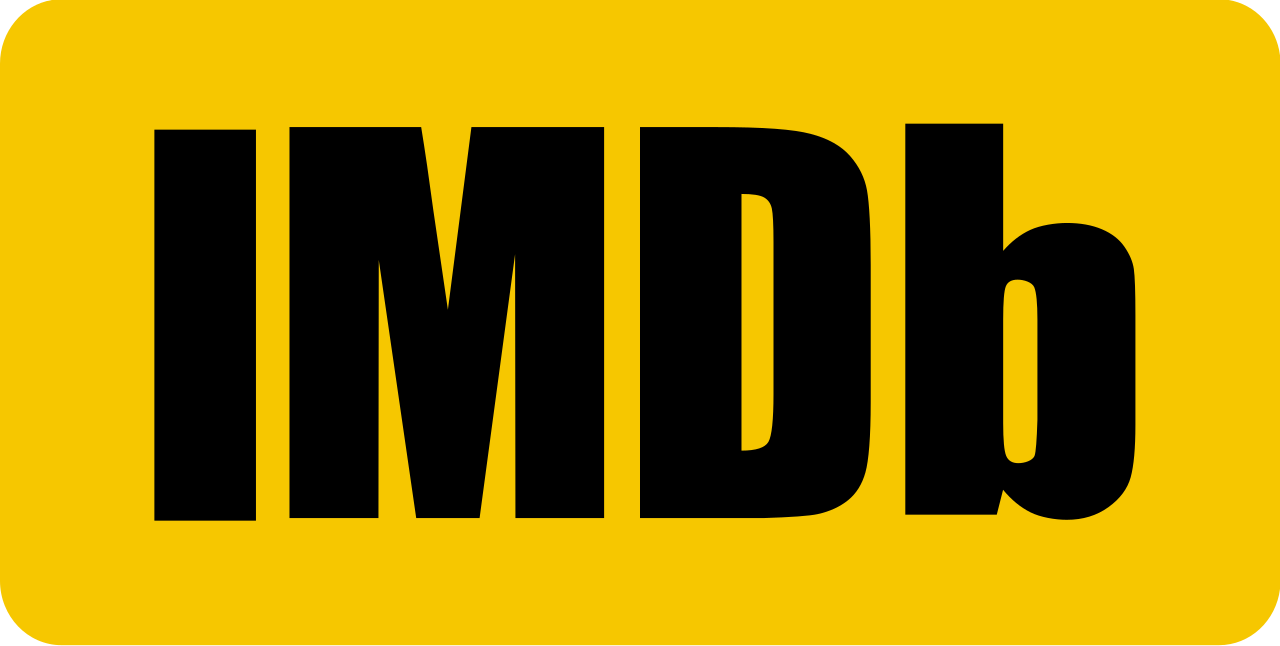
## Introduction:
IMDb is the free online database that holds information about all kinds of movies and shows that users can access. IMDb stands for the Internet Movie Database. This dataset covers the information and features of 1000 movies released between the years 1920 through 2020. I chose this dataset because I wanted to have an understanding of what makes a movie popular.

Kaggle: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

##Questions:
Which movies genres are the most popular among the top 1000 movies in IMDb?

Do certain directors have more movies that have a higher rating and money earned for movies than others?

## EDA Process:
Since I wanted to understand what makes a movie popular and also an understanding of the data provided, I will focus on the impact that a movie's features has on its popularity. Therefore, I will start I will start with loading the dataset and seeing the top 5 rows to get an understanding of the data.

In [1]:
#Importing and reading the Top 1000 IMDb movies dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

top_movies=pd.read_csv('imdb_top_1000.csv')
top_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Then I wanted to see the shape of the data in terms of columns and rows.

In [2]:
top_movies.shape

(1000, 16)

From here we can see that there are 1000 rows corresponding to the number of movies and then 18 columns corresponding to the movie attributes and features. Then, I also wanted to see a summary statistics to understand how the data is distributed along the attributes

In [3]:
top_movies.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


I also wanted to understand the data types of the variables to get an understand of which type of graphs would be suitable for my analysis.

In [7]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 125.1+ KB


I saw that the release year in the dataset was a string data type so I converted it to a numeric data type so I could then analyze the range of the release years.

In [5]:
top_movies['Released_Year'] = pd.to_numeric(top_movies['Released_Year'], errors='coerce')

In [6]:
top_movies['Gross'] = top_movies['Gross'].str.replace(',', '')
top_movies['Gross'] = top_movies['Gross'].astype('float64')

Then I saw that the `Gross` column related to the money earned from a movie, was a string so I convereted the column to a numeric data type

In [8]:
top_movies.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,1
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


I also wanted to check if there were any nulls in the data using isnull().

In [15]:
imdb_top_1000 = top_movies[['Genre', 'Released_Year', 'IMDB_Rating', 'Director', 'Gross']]
imdb_top_1000.head()

,Genre,Released_Year,IMDB_Rating,Director,Gross
0,Drama,1994.0,9.3,Frank Darabont,28341469.0
1,"Crime, Drama",1972.0,9.2,Francis Ford Coppola,134966411.0
2,"Action, Crime, Drama",2008.0,9.0,Christopher Nolan,534858444.0
3,"Crime, Drama",1974.0,9.0,Francis Ford Coppola,57300000.0
4,"Crime, Drama",1957.0,9.0,Sidney Lumet,4360000.0


In [16]:
ratings = imdb_top_1000['IMDB_Rating'].to_numpy()
print(np.mean(ratings))

7.949299999999999


Using numpy I looked into the average movie popularity score from the top 1000 movies in the dataset

In [18]:
release_year = imdb_top_1000['Released_Year']
print(max(release_year), min(release_year))

2020.0 1920.0


Then, I was able to find the range of the movie release years being between 1920 and 2020 for the top 1000 movies in IMDb.

<ipython-input-60-4339d61a2daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_top_1000['genre_split'] = imdb_top_1000['Genre'].str.split(', ')


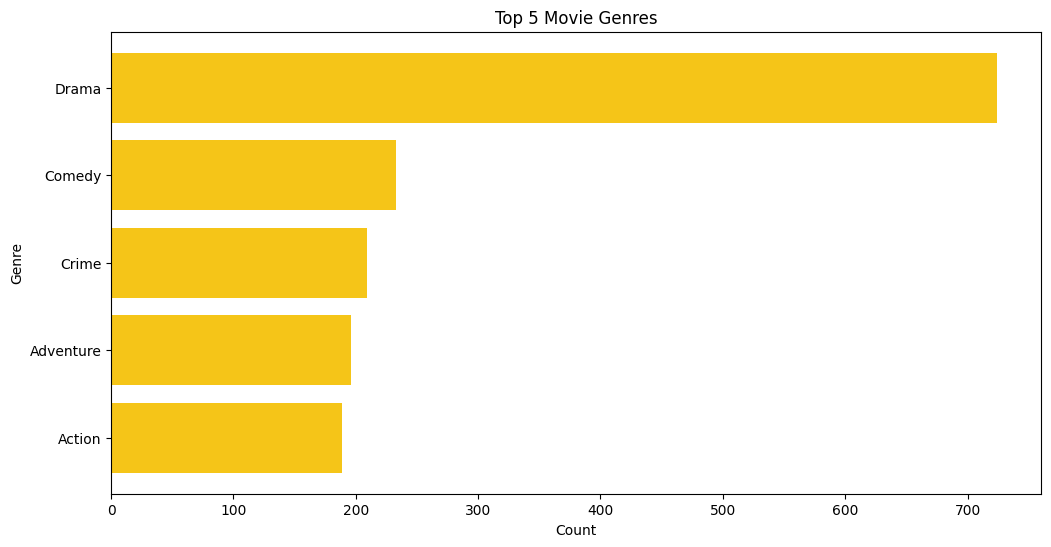

In [60]:
# I am splitting the genres and using explode to count individual genres
imdb_top_1000['genre_split'] = imdb_top_1000['Genre'].str.split(', ')
genre_exp = imdb_top_1000.explode('genre_split')

# I am counting the frequency for  each genre
genre_counts = genre_exp['genre_split'].value_counts()

# I am pulling the top 5 genres and sorting the genres
top_5_movie_genres = genre_counts.head().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(y=top_5_movie_genres.index, width=top_5_movie_genres.values, color=	"#F5C518")
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 5 Movie Genres')
plt.show()

I wanted to start by looking at the top 5 genres where most of the top 1000 movies in IMDb fall under best shown in a horizontal bar graph. We can see that Drama is the genre has the highest number of movies in comparison to Comedy, Crime, Adventure, and Action.

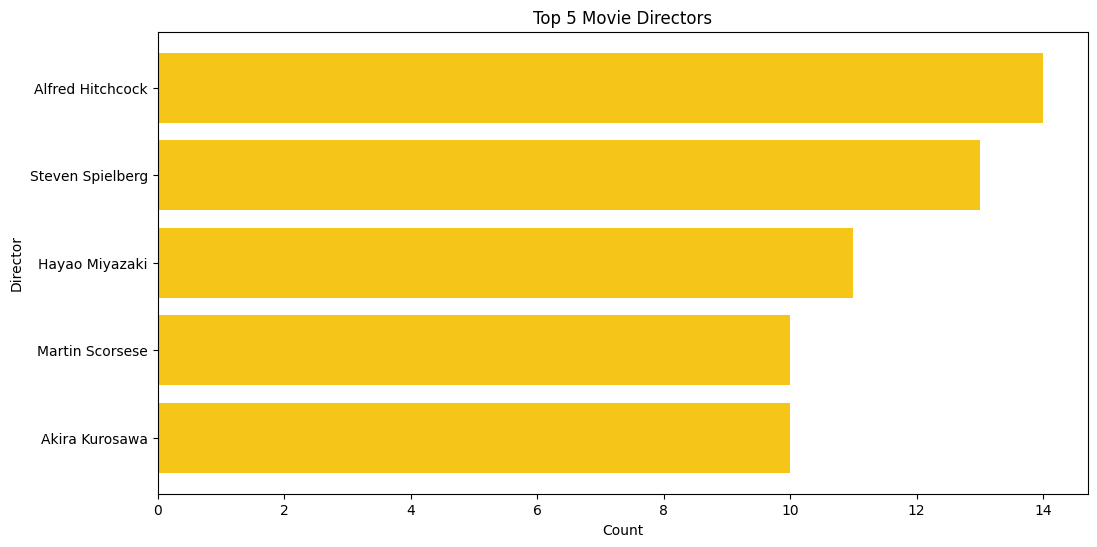

In [78]:
# I am counting the frequency for Director
Director_counts = imdb_top_1000['Director'].value_counts()

# I am pulling the top 5 Directors
top_5_Directors = Director_counts.head().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(y=top_5_Directors.index, width=top_5_Directors.values, color="#F5C518")
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 5 Movie Directors')
plt.show()

Then, I wanted to take a look at the top 5 directors that took part in the creation of the top 1000 movies in IMDb best shown as a horizontal bar graph. We can see that Alfred Hitchcock has the highest number of movies in which he particpated as the director following closely with Steven Spielberg.

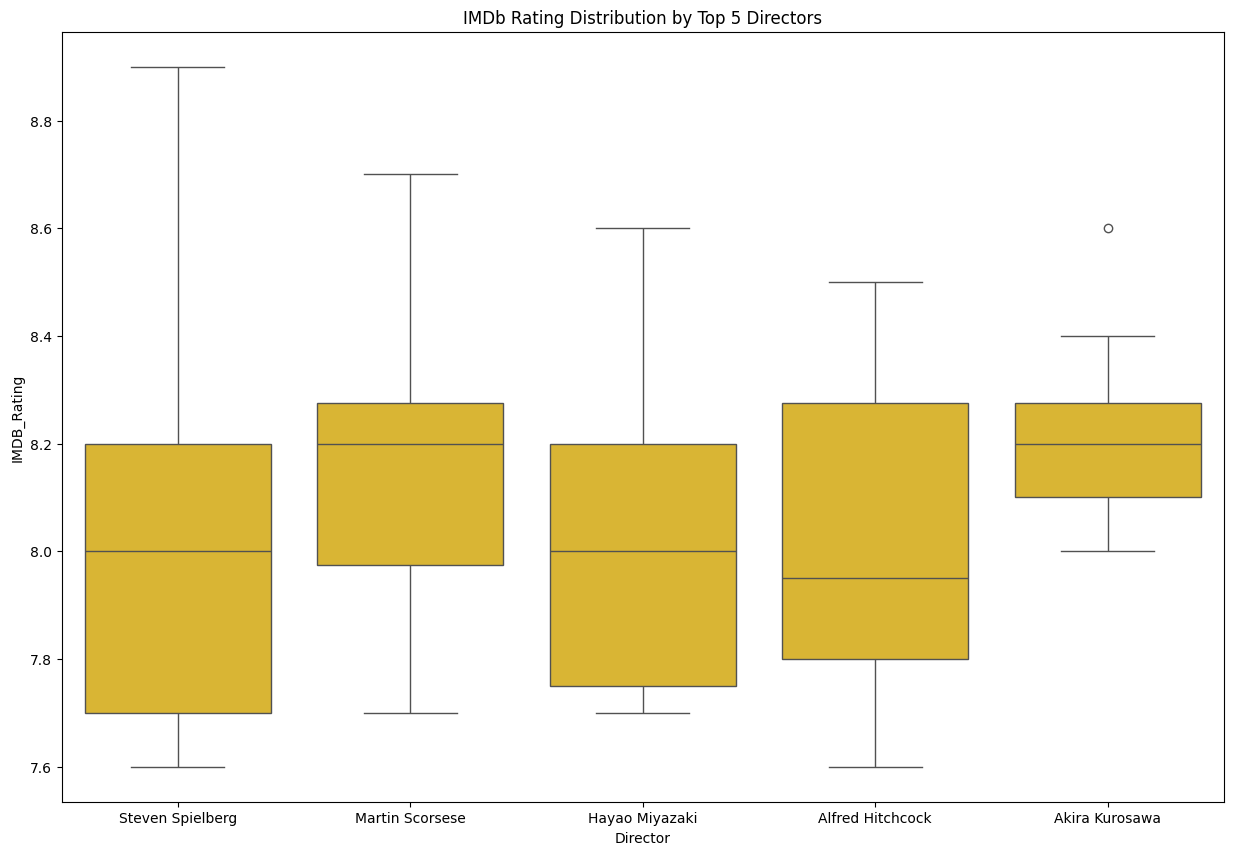

In [75]:
# I am calculating the count of movies for each director and select the top 5
top_5_directors = imdb_top_1000['Director'].value_counts().head().index

# I am filtering the dataset for the top 5 directors
imdb_top_5 = imdb_top_1000[imdb_top_1000['Director'].isin(top_5_directors)].sort_values(by=['Director'],ascending=False)

# Plot the boxplot for the top 5 directors
plt.figure(figsize=(15,10))
sns.boxplot(x='Director', y='IMDB_Rating', data=imdb_top_5, color="#F5C518")
plt.xlabel('Director')
plt.ylabel('IMDB_Rating')
plt.title('IMDb Rating Distribution by Top 5 Directors')
plt.show()

Then, with the top 5 directors, I wanted to see how the distribution of the movie popularity score compared for all movies in which each of the directors participated in. Thereby, I believed a Boxplot would best show the variability and add another layer of analysis. We can see that Steven Spielberg has the highest variability in the movie popularity score and the median being a score of 8 is higher than the median that Alfred Hitchcock has despite Alfred Hitchcock particpating in more movies as a director.

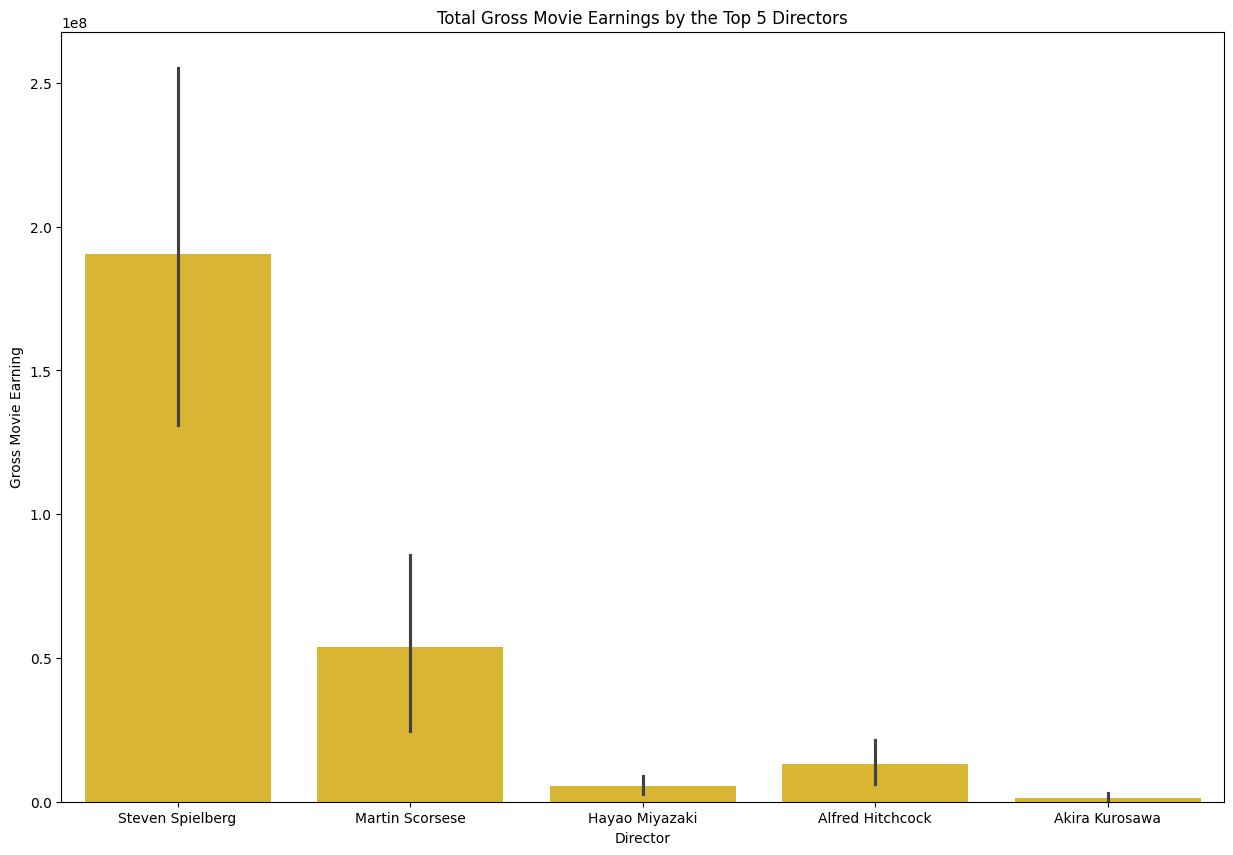

In [74]:
# I am calculating the count of movies for each director and select the top 5
top_5_directors = imdb_top_1000['Director'].value_counts().head().index


# I am filtering the dataset for the top 5 directors
imdb_top_5 = imdb_top_1000[imdb_top_1000['Director'].isin(top_5_directors)].sort_values(by=['Director'],ascending=False)


# Plot the barplot for the top 5 directors
plt.figure(figsize=(15,10))
sns.barplot(x='Director', y='Gross', data=imdb_top_5, color="#F5C518")
plt.xlabel('Director')
plt.ylabel('Gross Movie Earning')
plt.title('Total Gross Movie Earnings by the Top 5 Directors')
plt.show()

Finally, I chose to look at the total gross earnings that the top 5 directors had for the movies they participated in, best shown as a vertical bar graph for visual comparison. We can see that Steven Spielberg has partipcated in movies that attributed to the highest total movie earnings in his role as Director as opposed to Alfred Hitchcock who as we saw previously has more movie partipations as Director.

## Simulate a nonparametric inference of the Median for the IMDb Ratings variable in the Top 1000 IMDb Movies Dataset

In [83]:
# I am taking a 10% sample of the IMDb Ratings column (currently there are 1000 rows in the dataset overall)
imdb_ratings = imdb_top_1000['IMDB_Rating'].sample(n=100)
np.median(imdb_ratings)

np.float64(7.9)

In [85]:
median_imdb_rating_boot_samples = []
for i in range(10000):
                boot_sample = np.random.choice(imdb_ratings, 100)
                median_imdb_rating_boot_samples.append(np.median(boot_sample))

np.mean(median_imdb_rating_boot_samples)

np.float64(7.888890000000001)

In [86]:
conf_int = np.percentile(median_imdb_rating_boot_samples, [2.5, 97.5]) # The middle 95% interval
conf_int

array([7.8, 8. ])

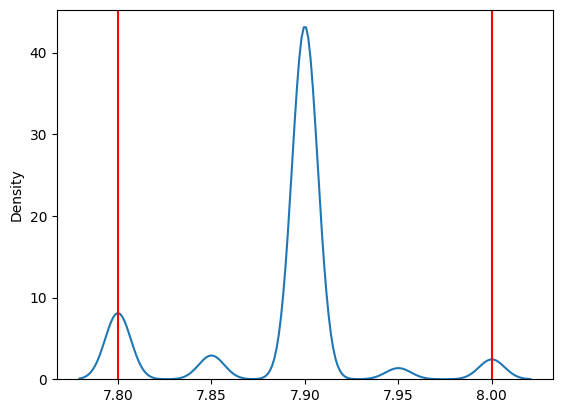

In [87]:
#I am plotting the result
sns.kdeplot(median_imdb_rating_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

## Conclusion:

We were able to look at the most popular genres within the Top 1000 movies in IMDb being Drama, Comedy, Crime, Adventure, and Action. Then, we were able to see that top 5 movie directors which were Alfred Hitchcock, Steven Spielberg, Hayao Miyazaki, Martin Scorsese, and Akira Kurosawa. However, in going into the layers of the movie features we were able to see that there were some discrepancies between movie partipation and movie popularity, along with movie earnings. This made the answer to the second question become inconclusive needing more research and analysis as we were not able to see consistency in director's role in a movie's popularity. Currently we can probably conclude that not only one factor or attribute of a movie contributes to its success and popularity. In the future, what could be explored further would be the types of genre that those top 5 movie director partipated in individually along with looking at the actors role in a movie's popularity.